## Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
* **satisfaction_level** - Уровень удовлетворенности работой
* **Last_evaluation** - Время с момента последней оценки в годах
* **number_projects** - Количество проектов, выполненных за время работы
* **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
* **time_spend_company** - Стаж работы в компании в годах
* **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
* **left** - уволился ли сотрудник
* **promotion_last_5years** - повышался ли сотрудник за последние пять лет
* **department** - отдел в котором работает сотрудник
* **salary** - относительный уровень зарплаты

Требуется выполнить следующее задание:

| #  | Задание | Баллы |
| :- | :- | :- |
| 1 | Загрузите файл HR.csv в pandas dataframe | 5 |
| 2 | Рассчитайте основные статистики для переменных(среднее, медиана, мода, мин/макс, сред.отклонение). | 10 |
| 3 | Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. | 10 |
| 4 | Рассчитайте сколько сотрудников работает в каждом департаменте. | 5 |
| 5 | Показать распределение сотрудников по зарплатам. | 5 |
| 6 | Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности | 5 |
| 7 | Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом | 10 |
| 8 | Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): Доля сотрудников с повышением за последние 5 лет; Средняя степень удовлетворенности; Среднее количество проектов | 10 |
| 9 | Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary). Оценить качество модели на тестовой выборки | 20 |
| 10 | Загрузить jupyter notebook с решением на github и прислать ссылку | 5 |

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

## Решение

In [1]:
import pandas
import seaborn
from matplotlib import pyplot, ticker
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

### 1. Загрузите файл HR.csv в pandas dataframe (5 баллов)

In [2]:
def make_hr_data_frame() -> pandas.DataFrame:
    data_frame = pandas.read_csv('HR.csv')
    data_frame = data_frame.rename(columns={'Work_accident': 'work_accident'})

    for key in ['work_accident', 'left', 'promotion_last_5years']:
        data_frame[key] = data_frame[key] == 1
    return data_frame

hr_data_frame = make_hr_data_frame()

In [3]:
hr_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  bool   
 6   left                   14999 non-null  bool   
 7   promotion_last_5years  14999 non-null  bool   
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: bool(3), float64(2), int64(3), object(2)
memory usage: 864.3+ KB


In [4]:
hr_data_frame

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,False,True,False,sales,low
1,0.80,0.86,5,262,6,False,True,False,sales,medium
2,0.11,0.88,7,272,4,False,True,False,sales,medium
3,0.72,0.87,5,223,5,False,True,False,sales,low
4,0.37,0.52,2,159,3,False,True,False,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,False,True,False,support,low
14995,0.37,0.48,2,160,3,False,True,False,support,low
14996,0.37,0.53,2,143,3,False,True,False,support,low
14997,0.11,0.96,6,280,4,False,True,False,support,low


### 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение). (10 баллов)

In [5]:
# среднее, мин/макс, сред.отклонение
hr_data_frame.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [6]:
# медиана
hr_data_frame.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
# мода
hr_data_frame.mode().dropna()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,False,False,False,sales,low


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименеескоррелированные переменные. (10 баллов)

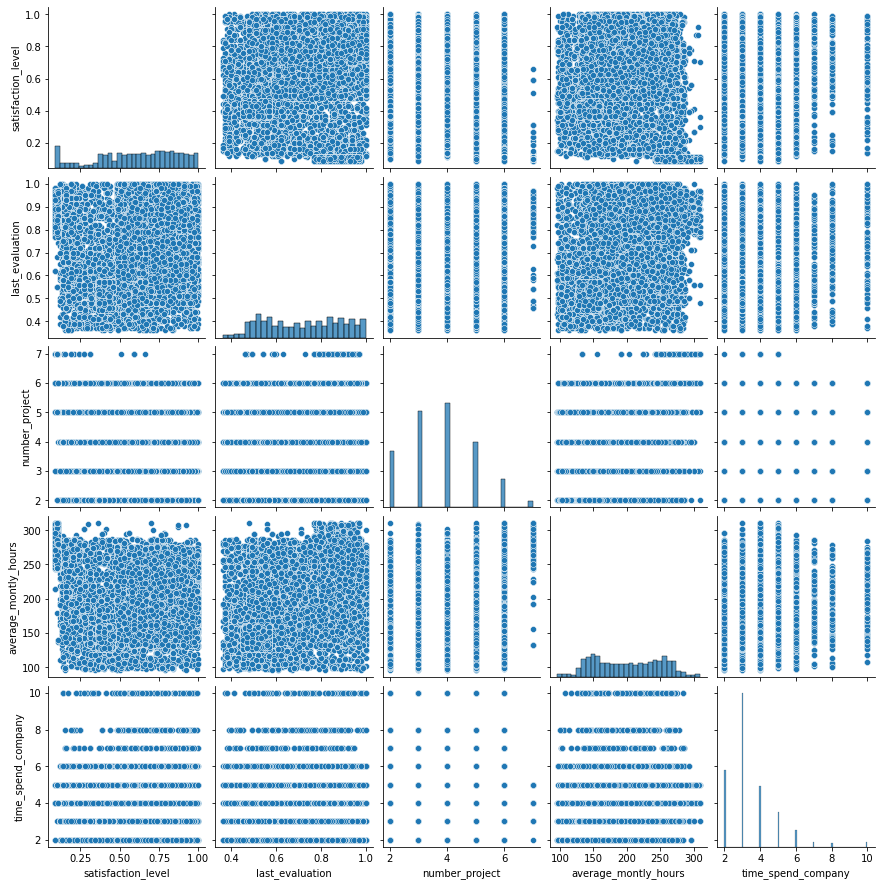

In [8]:
def get_numetric_hr_data_frame(data_frame: pandas.DataFrame) -> pandas.DataFrame:
    return data_frame[[
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company'
    ]]

def show_data_matrix(data_frame: pandas.DataFrame):
    seaborn.pairplot(data_frame)

show_data_matrix(
    data_frame=get_numetric_hr_data_frame(hr_data_frame)
)

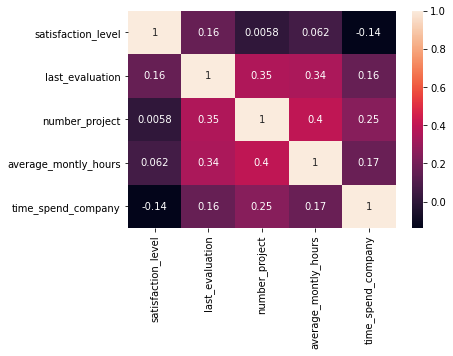

In [9]:
def show_corr_matrix(data_frame: pandas.DataFrame):
    seaborn.heatmap(data_frame.corr('spearman'), annot=True)

show_corr_matrix(
    data_frame=get_numetric_hr_data_frame(hr_data_frame)
)

Данные плохо коррелируют друг с другом.

Две самые с коррелированные переменные:
 - average_montly_hours - Среднее количество часов на рабочем месте в месяц
 - number_project - Количество проектов, выполненных за время работы

Две самые с **не** коррелированные переменные:
 - satisfaction_level - Уровень удовлетворенности работой
 - number_project - Количество проектов, выполненных за время работы

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте. (5 баллов)

In [10]:
def get_department_table(data_frame: pandas.DataFrame) -> pandas.DataFrame:
    department_table = data_frame.groupby('department').count()
    department_table['employees'] = department_table['satisfaction_level']
    return department_table.loc[:, ['employees']]

get_department_table(hr_data_frame)

,employees
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


### 5. Показать распределение сотрудников по зарплатам. (5 баллов)

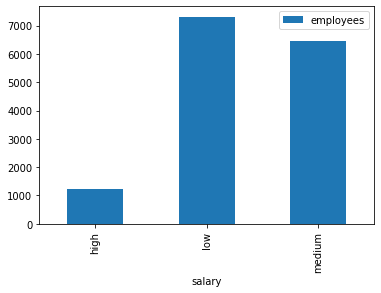

In [11]:
def build_salary_graph(hr_data_frame: pandas.DataFrame):
    data = hr_data_frame.groupby('salary').count()
    data['employees'] = data['satisfaction_level']
    data[['employees']].plot(kind='bar')

build_salary_graph(
    hr_data_frame=hr_data_frame
)
pyplot.show()

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности. (5 баллов)

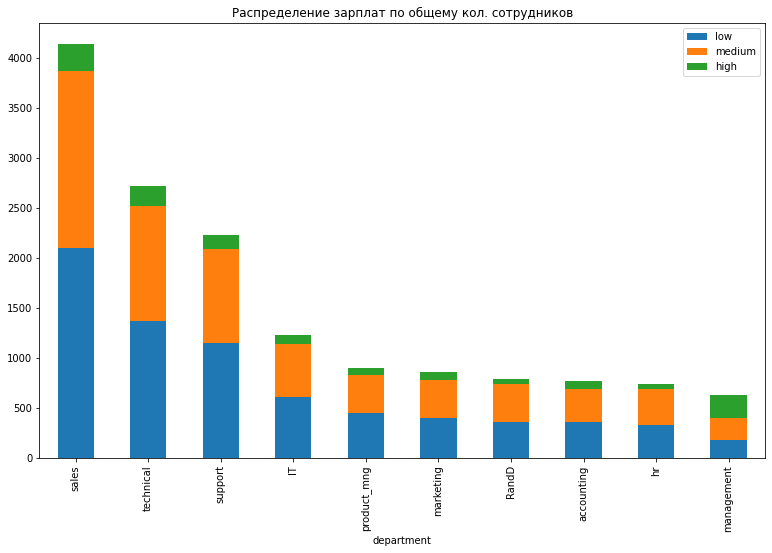

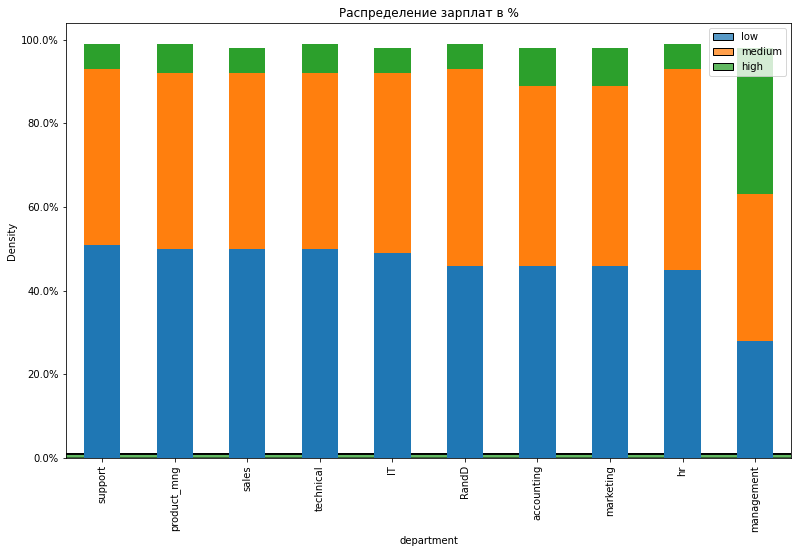

In [12]:
def get_salary_graph_data_frame(hr_data_frame: pandas.DataFrame):
    data: pandas.DataFrame = hr_data_frame.groupby('department').count()[['salary']]
    data['high'] = hr_data_frame.loc[hr_data_frame['salary'] == 'high'].groupby('department').count()[['salary']]
    data['medium'] = hr_data_frame.loc[hr_data_frame['salary'] == 'medium'].groupby('department').count()[['salary']]
    data['low'] = hr_data_frame.loc[hr_data_frame['salary'] == 'low'].groupby('department').count()[['salary']]
    return data

def transform_salary_graph_data_frame_to_percent(row):
    total = row['low'] + row['medium'] + row['high']

    for key in ['low', 'medium', 'high']:
        row[key] = (row[key] / total) * 100

    return row

def build_salary_department_graph(salary_data_frame: pandas.DataFrame):
    _, axes = pyplot.subplots(figsize=(13, 8))

    salary_data_frame.sort_values(
        'salary',
        ascending=False
    )[['low', 'medium', 'high']].plot(
        kind='bar',
        stacked=True,
        title='Распределение зарплат по общему кол. сотрудников',
        ax=axes
    )

def build_salary_department_graph_fill(salary_data_frame: pandas.DataFrame):
    _, axes = pyplot.subplots(figsize=(13, 8))
    axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{}%'.format(x)))
    data = salary_data_frame[['low', 'medium', 'high']].apply(transform_salary_graph_data_frame_to_percent, axis=1)

    data.sort_values('low', ascending=False).plot(
        kind='bar',
        stacked=True,
        title='Распределение зарплат в %',
        ax=axes
    )
    seaborn.kdeplot(
        data=data,
        multiple="fill",
        ax=axes
    )

build_salary_department_graph(
    salary_data_frame=get_salary_graph_data_frame(hr_data_frame)
)
build_salary_department_graph_fill(
    salary_data_frame=get_salary_graph_data_frame(hr_data_frame)
)
pyplot.show()

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. (10 баллов)

In [13]:
hr_data_frame[['salary', 'average_montly_hours']].groupby('salary').mean()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


In [14]:
hr_data_frame[['salary', 'average_montly_hours']].groupby('salary').median()

,average_montly_hours
salary,
high,199
low,199
medium,201


Среднее и медиана показывают что сотрудники с любым уровнем оклада проводят одинаковое кол. времени.

### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности) (10 баллов):
 - **Доля сотрудников с повышением за последние 5 лет**
 - **Средняя степень удовлетворенности**
 - **Среднее количество проектов**

In [15]:
def get_converted_data_frame(hr_data_frame: pandas.DataFrame) -> pandas.DataFrame:
    data: pandas.DataFrame = hr_data_frame.copy()
    data['promotion_last_5years'] = data['promotion_last_5years'].apply(lambda value: 'повышали' if value == 1 else 'не повышали')
    data['left'] = data['left'].apply(lambda value: 'уволился' if value == 1 else 'работает')
    return data

In [16]:
def print_left_info(data_frame: pandas.DataFrame):
    no_promotion_data = data_frame[data_frame['promotion_last_5years'] == 'не повышали'].groupby('left').count()
    print('Не повышали\n',no_promotion_data['promotion_last_5years'])
    print()

    promotion_data = data_frame[data_frame['promotion_last_5years'] == 'повышали'].groupby('left').count()
    print('Повышали\n',promotion_data['promotion_last_5years'])
    print()

    mean_data = data_frame.groupby('left').mean()
    print('Средняя степень удовлетворенности\n', mean_data['satisfaction_level'])
    print()
    print('Среднее количество проектов\n', mean_data['number_project'])

print_left_info(
    data_frame=get_converted_data_frame(hr_data_frame)
)

Не повышали
 left
работает    11128
уволился     3552
Name: promotion_last_5years, dtype: int64

Повышали
 left
работает    300
уволился     19
Name: promotion_last_5years, dtype: int64

Средняя степень удовлетворенности
 left
работает    0.666810
уволился    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов
 left
работает    3.786664
уволился    3.855503
Name: number_project, dtype: float64


**Доля сотрудников с повышением за последние 5 лет**

- 31% уволившихся сотрудников среди которых не повышали за последние пять лет
- 6% уволившихся сотрудников среди которых повышали за последние пять лет

**Средняя степень удовлетворенности**

Уволившиеся были менее удовлетворены работой (0.44) чем те кто не уволнялся (0.66)

**Среднее количество проектов**

Уволившиеся и не уволившиеся, в среднем делали одинаковое количество проектов (3.8)

**Дополнительно можно посмотреть на графики ниже:**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


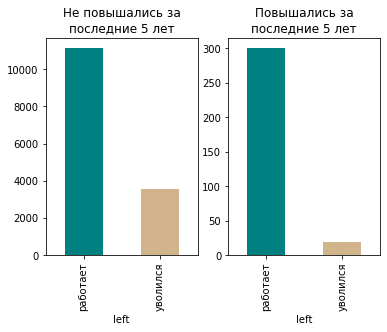

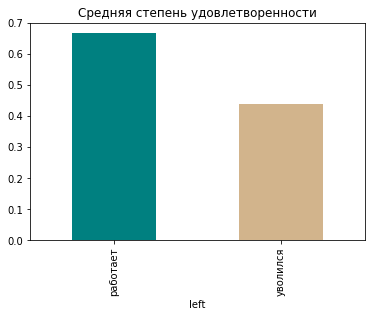

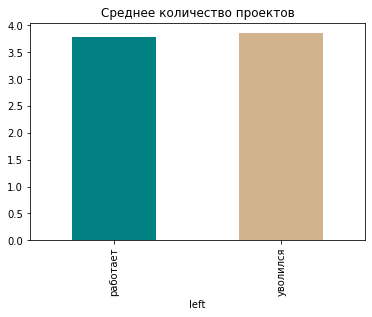

In [17]:
def build_left_graph(data_frame: pandas.DataFrame):
    _, (axes1, axes2) = pyplot.subplots(1, 2)

    no_promotion_data = data_frame[data_frame['promotion_last_5years'] == 'не повышали'].groupby('left').count()
    no_promotion_data['promotion_last_5years'].plot(
        kind='bar',
        title='Не повышались за\nпоследние 5 лет',
        color=['teal', 'tan'],
        ax=axes1
    )

    promotion_data = data_frame[data_frame['promotion_last_5years'] == 'повышали'].groupby('left').count()
    promotion_data['promotion_last_5years'].plot(
        kind='bar',
        title='Повышались за\nпоследние 5 лет',
        color=['teal', 'tan'],
        ax=axes2
    )

def build_mean_satisfaction_level_projects_graph(data_frame: pandas.DataFrame):
    _, axes = pyplot.subplots()
    data_frame.groupby('left').mean()['satisfaction_level'].plot(
        kind='bar',
        title='Средняя степень удовлетворенности',
        color=['teal', 'tan'],
        ax=axes
    )

def build_mean_number_projects_graph(data_frame: pandas.DataFrame):
    _, axes = pyplot.subplots()
    data_frame.groupby('left').mean()['number_project'].plot(
        kind='bar',
        title='Среднее количество проектов',
        color=['teal', 'tan'],
        ax=axes
    )

build_left_graph(
    data_frame=get_converted_data_frame(hr_data_frame)
)

build_mean_satisfaction_level_projects_graph(
    data_frame=get_converted_data_frame(hr_data_frame)
)

build_mean_number_projects_graph(
    data_frame=get_converted_data_frame(hr_data_frame)
)

pyplot.show()

### 9. Разделить данные на тестовую и обучающую выборки.
### Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
### Оценить качество модели на тестовой выборки. (20 баллов)

In [18]:
# Разделение данных на тестовую и обучающую выборки
x_train, x_test, y_train, y_test = train_test_split(
    hr_data_frame[['satisfaction_level',# Уровень удовлетворенности работой
                   'last_evaluation',# Время с момента последней оценки в годах
                    'number_project',# Количество проектов, выполненных за время работы
                    'average_montly_hours',# Среднее количество часов на рабочем месте в месяц
                    'time_spend_company',# Стаж работы в компании в годах
                    'work_accident',# Происходили ли несчастные случаи на рабочем месте с сотрудником
                    'promotion_last_5years'# повышался ли сотрудник за последние пять лет
                   ]],
    hr_data_frame['left'],
    test_size=0.3,
    random_state=404
)

In [19]:
# Построение модели LDA
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)

data_predict = x_test.copy()
data_predict['left predict'] = lda.predict(x_test)
data_predict['left fact'] = y_test
data_predict

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left predict,left fact
1331,0.09,0.86,6,297,4,False,False,True,True
760,0.10,0.90,7,290,4,False,False,True,True
744,0.39,0.52,2,134,3,False,False,False,True
6880,0.14,0.71,2,155,3,False,False,True,False
2640,0.69,0.56,4,178,3,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14898,0.10,0.90,7,269,4,False,False,True,True
14594,0.38,0.51,2,159,3,False,False,False,True
14447,0.40,0.53,2,151,3,False,False,False,True
14353,0.11,0.80,6,256,4,False,False,True,True


In [20]:
# Оценка качества модели
accuracy_score(y_test,
               lda.predict(x_test))

0.7664444444444445

### 10. Загрузить jupyter notebook с решением на github и прислать ссылку. (5 баллов)

done